In [78]:
import numpy as np
import pandas as pd
import data_clean_functions as dcf
import os
import pickle

In [79]:
with open('/Users/robertpagano/src/metis_project_luther/data/merged_data_2014_2018_final_uncleaned.pickle', "rb") as to_read:
    df = pickle.load(to_read)

In [80]:
df.head()

,Gm#,Date,,Tm,Location,Opp,W/L,runs_scored,runs_allowed,Inn,...,cum_runs_allowed,run_differential,Win_differential,win_value,Wins_last_10,Mean_runs_last_10,date_fixed,year,month,day
0,1,201403310,boxscore,ATL,@,MIL,L,0,2,,...,2,-2,-1,0,NaN,0.0,20140331,2014,03,31
1,2,201404010,boxscore,ATL,@,MIL,W,5,2,,...,4,1,0,1,NaN,2.5,20140401,2014,04,01
2,3,201404020,boxscore,ATL,@,MIL,W,1,0,,...,4,2,1,1,NaN,2.0,20140402,2014,04,02
3,4,201404040,boxscore,ATL,@,WSN,W,2,1,,...,5,3,2,1,NaN,2.0,20140404,2014,04,04
4,5,201404050,boxscore,ATL,@,WSN,W,6,2,,...,7,7,3,1,NaN,2.8,20140405,2014,04,05


In [81]:
df.columns

Index(['Gm#', 'Date', '', 'Tm', 'Location', 'Opp', 'W/L', 'runs_scored',
       'runs_allowed', 'Inn', 'W-L', 'Rank', 'GB', 'Win', 'Loss', 'Save',
       'Time', 'is_night', 'Attendance', 'Streak', 'Orig. Scheduled',
       'is_home', 'Total_wins', 'Total_losses', 'cum_runs_scored',
       'cum_runs_allowed', 'run_differential', 'Win_differential', 'win_value',
       'Wins_last_10', 'Mean_runs_last_10', 'date_fixed', 'year', 'month',
       'day'],
      dtype='object')

In [83]:
df = df[['Attendance', 'Gm#', 'Date', 'Tm', 'Opp', 'W/L', 'runs_scored', 'runs_allowed', 'W-L', 'Rank', 'GB', 'Time', 'is_night', 'Streak', 'is_home', 'Total_wins', 'Total_losses', 'cum_runs_scored', 'cum_runs_allowed', 'run_differential', 'Win_differential', 'win_value', 'Wins_last_10', 'Mean_runs_last_10', 'date_fixed', 'year', 'month', 'day']]
df.columns

Index(['Attendance', 'Gm#', 'Date', 'Tm', 'Opp', 'W/L', 'runs_scored',
       'runs_allowed', 'W-L', 'Rank', 'GB', 'Time', 'is_night', 'Streak',
       'is_home', 'Total_wins', 'Total_losses', 'cum_runs_scored',
       'cum_runs_allowed', 'run_differential', 'Win_differential', 'win_value',
       'Wins_last_10', 'Mean_runs_last_10', 'date_fixed', 'year', 'month',
       'day'],
      dtype='object')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24296 entries, 0 to 24295
Data columns (total 28 columns):
Attendance           24196 non-null float64
Gm#                  24296 non-null object
Date                 24296 non-null object
Tm                   24296 non-null object
Opp                  24296 non-null object
W/L                  24296 non-null object
runs_scored          24296 non-null int64
runs_allowed         24296 non-null int64
W-L                  24296 non-null object
Rank                 24296 non-null object
GB                   24296 non-null float64
Time                 24296 non-null object
is_night             24296 non-null int64
Streak               24296 non-null object
is_home              24296 non-null int64
Total_wins           24296 non-null int64
Total_losses         24296 non-null int64
cum_runs_scored      24296 non-null int64
cum_runs_allowed     24296 non-null int64
run_differential     24296 non-null int64
Win_differential     24296 non-null in

In [85]:
df['Gm#'] = df['Gm#'].apply(pd.to_numeric)

In [67]:
df.sample(5)

,Attendance,Gm#,Date,Tm,Opp,W/L,runs_scored,runs_allowed,W-L,Rank,...,cum_runs_allowed,run_differential,Win_differential,win_value,Wins_last_10,Mean_runs_last_10,date_fixed,year,month,day
7646,31496.0,35,201505140,NYM,CHC,L,5,6,20-15,1,...,113,17,5,0,4.0,2.9,20150514,2015,05,14
19723,43867.0,128,201808240,ARI,SEA,L,3,6,71-57,1,...,496,83,14,0,7.0,5.5,20180824,2018,08,24
24084,36798.0,113,201808080,TOR,BOS,L,5,10,51-62,4,...,578,-67,-11,0,4.0,4.7,20180808,2018,08,08
17365,17471.0,38,201705160,NYM,ARI,L,4,5,16-22,2,...,215,-24,-6,0,3.0,5.0,20170516,2017,05,16
22637,32204.0,123,201808180,OAK,HOU,W,7,1,74-49,1,...,510,72,25,1,7.0,4.4,20180818,2018,08,18


In [86]:
with open('merged_data_initial_clean_V2.pickle', 'wb') as to_write:
    pickle.dump(df, to_write)

Now what I am planning to do, filter down for just the features I want in initial analysis, and then pull in the OPP features for the same. I.e. there will be an opp GB, win_differential, etc.

Below I'm going to do some more feature engineering:
 - Opponent values
 - payroll (plus opponent payroll)
 - day of week
 - Batter age
 - all-stars

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24296 entries, 0 to 24295
Data columns (total 28 columns):
Attendance           24196 non-null float64
Gm#                  24296 non-null int64
Date                 24296 non-null object
Tm                   24296 non-null object
Opp                  24296 non-null object
W/L                  24296 non-null object
runs_scored          24296 non-null int64
runs_allowed         24296 non-null int64
W-L                  24296 non-null object
Rank                 24296 non-null object
GB                   24296 non-null float64
Time                 24296 non-null object
is_night             24296 non-null int64
Streak               24296 non-null object
is_home              24296 non-null int64
Total_wins           24296 non-null int64
Total_losses         24296 non-null int64
cum_runs_scored      24296 non-null int64
cum_runs_allowed     24296 non-null int64
run_differential     24296 non-null int64
Win_differential     24296 non-null int

In [88]:
df['Tm_Date'] = df['Tm'] + df.date_fixed.map(str)
df['Opp_Date'] = df['Opp'] + df.date_fixed.map(str)

df.head()

,Attendance,Gm#,Date,Tm,Opp,W/L,runs_scored,runs_allowed,W-L,Rank,...,Win_differential,win_value,Wins_last_10,Mean_runs_last_10,date_fixed,year,month,day,Tm_Date,Opp_Date
0,45691.0,1,201403310,ATL,MIL,L,0,2,0-1,4,...,-1,0,NaN,0.0,20140331,2014,03,31,ATL20140331,MIL20140331
1,21503.0,2,201404010,ATL,MIL,W,5,2,1-1,3,...,0,1,NaN,2.5,20140401,2014,04,01,ATL20140401,MIL20140401
2,21712.0,3,201404020,ATL,MIL,W,1,0,2-1,2,...,1,1,NaN,2.0,20140402,2014,04,02,ATL20140402,MIL20140402
3,42834.0,4,201404040,ATL,WSN,W,2,1,3-1,2,...,2,1,NaN,2.0,20140404,2014,04,04,ATL20140404,WSN20140404
4,37841.0,5,201404050,ATL,WSN,W,6,2,4-1,2,...,3,1,NaN,2.8,20140405,2014,04,05,ATL20140405,WSN20140405


Below I am using merge function to pull in opponent values


In [91]:
df['Rank'] = df['Rank'].apply(pd.to_numeric)
df.head()


,Attendance,Gm#,Date,Tm,Opp,W/L,runs_scored,runs_allowed,W-L,Rank,...,Win_differential,win_value,Wins_last_10,Mean_runs_last_10,date_fixed,year,month,day,Tm_Date,Opp_Date
0,45691.0,1,201403310,ATL,MIL,L,0,2,0-1,4,...,-1,0,NaN,0.0,20140331,2014,03,31,ATL20140331,MIL20140331
1,21503.0,2,201404010,ATL,MIL,W,5,2,1-1,3,...,0,1,NaN,2.5,20140401,2014,04,01,ATL20140401,MIL20140401
2,21712.0,3,201404020,ATL,MIL,W,1,0,2-1,2,...,1,1,NaN,2.0,20140402,2014,04,02,ATL20140402,MIL20140402
3,42834.0,4,201404040,ATL,WSN,W,2,1,3-1,2,...,2,1,NaN,2.0,20140404,2014,04,04,ATL20140404,WSN20140404
4,37841.0,5,201404050,ATL,WSN,W,6,2,4-1,2,...,3,1,NaN,2.8,20140405,2014,04,05,ATL20140405,WSN20140405


In [92]:
df['team_year'] = df['Tm'] + df['year']
df.head()

,Attendance,Gm#,Date,Tm,Opp,W/L,runs_scored,runs_allowed,W-L,Rank,...,win_value,Wins_last_10,Mean_runs_last_10,date_fixed,year,month,day,Tm_Date,Opp_Date,team_year
0,45691.0,1,201403310,ATL,MIL,L,0,2,0-1,4,...,0,NaN,0.0,20140331,2014,03,31,ATL20140331,MIL20140331,ATL2014
1,21503.0,2,201404010,ATL,MIL,W,5,2,1-1,3,...,1,NaN,2.5,20140401,2014,04,01,ATL20140401,MIL20140401,ATL2014
2,21712.0,3,201404020,ATL,MIL,W,1,0,2-1,2,...,1,NaN,2.0,20140402,2014,04,02,ATL20140402,MIL20140402,ATL2014
3,42834.0,4,201404040,ATL,WSN,W,2,1,3-1,2,...,1,NaN,2.0,20140404,2014,04,04,ATL20140404,WSN20140404,ATL2014
4,37841.0,5,201404050,ATL,WSN,W,6,2,4-1,2,...,1,NaN,2.8,20140405,2014,04,05,ATL20140405,WSN20140405,ATL2014


In [102]:
team_salaries = pd.read_csv('/Users/robertpagano/src/metis_project_luther/Data/team_salary.csv', delimiter=',')
team_salaries.tail(30)

,team_year,batter_age,current_all_stars,lifetime_all_stars,player_salary
120,ARI2014,27.6,2,13,89926500
121,ATL2014,26.8,3,9,108081500
122,BAL2014,28.3,3,16,109097500
123,BOS2014,29.2,2,21,134628929
124,CHC2014,26.8,3,7,59800500
125,CHW2014,27.7,3,7,87475500
126,CIN2014,29.0,5,11,102230000
127,CLE2014,28.6,1,13,73509399
128,COL2014,27.4,2,9,95403500
129,DET2014,29.8,4,16,169135500


In [103]:
df = pd.merge(df, team_salaries, how='left', left_on='team_year', right_on='team_year')
df.head()

,Attendance,Gm#,Date,Tm,Opp,W/L,runs_scored,runs_allowed,W-L,Rank,...,year,month,day,Tm_Date,Opp_Date,team_year,batter_age,current_all_stars,lifetime_all_stars,player_salary
0,45691.0,1,201403310,ATL,MIL,L,0,2,0-1,4,...,2014,03,31,ATL20140331,MIL20140331,ATL2014,26.8,3,9,108081500
1,21503.0,2,201404010,ATL,MIL,W,5,2,1-1,3,...,2014,04,01,ATL20140401,MIL20140401,ATL2014,26.8,3,9,108081500
2,21712.0,3,201404020,ATL,MIL,W,1,0,2-1,2,...,2014,04,02,ATL20140402,MIL20140402,ATL2014,26.8,3,9,108081500
3,42834.0,4,201404040,ATL,WSN,W,2,1,3-1,2,...,2014,04,04,ATL20140404,WSN20140404,ATL2014,26.8,3,9,108081500
4,37841.0,5,201404050,ATL,WSN,W,6,2,4-1,2,...,2014,04,05,ATL20140405,WSN20140405,ATL2014,26.8,3,9,108081500


In [104]:
df_opp = df.copy()

Here I am creating another dataframe to prepare to merge the "opp" data with the main dataframe.

In [106]:
df_opp = df_opp[['Tm_Date', 'Wins_last_10', 'Win_differential', 'Rank', 'GB', 'Mean_runs_last_10', 'batter_age', 'current_all_stars', 'lifetime_all_stars', 'player_salary']]
df_opp.head()

,Tm_Date,Wins_last_10,Win_differential,Rank,GB,Mean_runs_last_10,batter_age,current_all_stars,lifetime_all_stars,player_salary
0,ATL20140331,NaN,-1,4,1.0,0.0,26.8,3,9,108081500
1,ATL20140401,NaN,0,3,1.0,2.5,26.8,3,9,108081500
2,ATL20140402,NaN,1,2,0.5,2.0,26.8,3,9,108081500
3,ATL20140404,NaN,2,2,0.5,2.0,26.8,3,9,108081500
4,ATL20140405,NaN,3,2,0.5,2.8,26.8,3,9,108081500


In [107]:
df_opp.rename(columns = {'Tm_Date': 'Opp_Date', 'Wins_last_10': 'Opp_Wins_last_10', 'Win_differential': 'Opp_Win_differential', 'Rank': 'Opp_Rank', 'GB': 'Opp_GB', 'Mean_runs_last_10': 'Opp_Mean_runs_last_10', 'batter_age': 'opp_batter_age', 'current_all_stars': 'opp_current_all_stars', 'lifetime_all_stars': 'opp_lifetime_all_stars', 'player_salary': 'opp_player_salary'}, inplace=True)
df_opp.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Opp_Date,Opp_Wins_last_10,Opp_Win_differential,Opp_Rank,Opp_GB,Opp_Mean_runs_last_10,opp_batter_age,opp_current_all_stars,opp_lifetime_all_stars,opp_player_salary
0,ATL20140331,NaN,-1,4,1.0,0.0,26.8,3,9,108081500
1,ATL20140401,NaN,0,3,1.0,2.5,26.8,3,9,108081500
2,ATL20140402,NaN,1,2,0.5,2.0,26.8,3,9,108081500
3,ATL20140404,NaN,2,2,0.5,2.0,26.8,3,9,108081500
4,ATL20140405,NaN,3,2,0.5,2.8,26.8,3,9,108081500


In [108]:
print(df.shape)
print(df_opp.shape)

(24296, 35)
(24296, 10)


In [109]:
df = pd.merge(df, df_opp, how='left', left_on='Opp_Date', right_on='Opp_Date')
df.head()

,Attendance,Gm#,Date,Tm,Opp,W/L,runs_scored,runs_allowed,W-L,Rank,...,player_salary,Opp_Wins_last_10,Opp_Win_differential,Opp_Rank,Opp_GB,Opp_Mean_runs_last_10,opp_batter_age,opp_current_all_stars,opp_lifetime_all_stars,opp_player_salary
0,45691.0,1,201403310,ATL,MIL,L,0,2,0-1,4,...,108081500,NaN,1,1,0.0,2.000000,28.8,4,14,109567000
1,21503.0,2,201404010,ATL,MIL,W,5,2,1-1,3,...,108081500,NaN,0,3,0.5,2.000000,28.8,4,14,109567000
2,21712.0,3,201404020,ATL,MIL,W,1,0,2-1,2,...,108081500,NaN,-1,4,1.5,1.333333,28.8,4,14,109567000
3,42834.0,4,201404040,ATL,WSN,W,2,1,3-1,2,...,108081500,NaN,2,2,0.5,5.750000,28.8,2,14,137235080
4,37841.0,5,201404050,ATL,WSN,W,6,2,4-1,2,...,108081500,NaN,1,3,1.5,5.000000,28.8,2,14,137235080


This worked! So now I have opposing team data.

Below, I want to decide when to cut off the weekend calculation, so I'll plot some data for attendance by day of week. First I will add day of week, then plot it:

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns


In [123]:
df['date_fixed'] = df['date_fixed'].apply(str)

In [134]:
df['weekday'] = df['datetime'].dt.dayofweek
df.head()

,Attendance,Gm#,Date,Tm,Opp,W/L,runs_scored,runs_allowed,W-L,Rank,...,Opp_Win_differential,Opp_Rank,Opp_GB,Opp_Mean_runs_last_10,opp_batter_age,opp_current_all_stars,opp_lifetime_all_stars,opp_player_salary,datetime,weekday
0,45691.0,1,201403310,ATL,MIL,L,0,2,0-1,4,...,1,1,0.0,2.000000,28.8,4,14,109567000,2014-03-31,0
1,21503.0,2,201404010,ATL,MIL,W,5,2,1-1,3,...,0,3,0.5,2.000000,28.8,4,14,109567000,2014-04-01,1
2,21712.0,3,201404020,ATL,MIL,W,1,0,2-1,2,...,-1,4,1.5,1.333333,28.8,4,14,109567000,2014-04-02,2
3,42834.0,4,201404040,ATL,WSN,W,2,1,3-1,2,...,2,2,0.5,5.750000,28.8,2,14,137235080,2014-04-04,4
4,37841.0,5,201404050,ATL,WSN,W,6,2,4-1,2,...,1,3,1.5,5.000000,28.8,2,14,137235080,2014-04-05,5


In [136]:
import datetime as dt
df['weekday'] = df[['datetime']].apply(lambda x: dt.datetime.strftime(x['datetime'], '%A'), axis=1)
df.head()

,Attendance,Gm#,Date,Tm,Opp,W/L,runs_scored,runs_allowed,W-L,Rank,...,Opp_Win_differential,Opp_Rank,Opp_GB,Opp_Mean_runs_last_10,opp_batter_age,opp_current_all_stars,opp_lifetime_all_stars,opp_player_salary,datetime,weekday
0,45691.0,1,201403310,ATL,MIL,L,0,2,0-1,4,...,1,1,0.0,2.000000,28.8,4,14,109567000,2014-03-31,Monday
1,21503.0,2,201404010,ATL,MIL,W,5,2,1-1,3,...,0,3,0.5,2.000000,28.8,4,14,109567000,2014-04-01,Tuesday
2,21712.0,3,201404020,ATL,MIL,W,1,0,2-1,2,...,-1,4,1.5,1.333333,28.8,4,14,109567000,2014-04-02,Wednesday
3,42834.0,4,201404040,ATL,WSN,W,2,1,3-1,2,...,2,2,0.5,5.750000,28.8,2,14,137235080,2014-04-04,Friday
4,37841.0,5,201404050,ATL,WSN,W,6,2,4-1,2,...,1,3,1.5,5.000000,28.8,2,14,137235080,2014-04-05,Saturday


In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24832 entries, 0 to 24831
Data columns (total 47 columns):
Attendance                24636 non-null float64
Gm#                       24832 non-null int64
Date                      24832 non-null object
Tm                        24832 non-null object
Opp                       24832 non-null object
W/L                       24832 non-null object
runs_scored               24832 non-null int64
runs_allowed              24832 non-null int64
W-L                       24832 non-null object
Rank                      24832 non-null int64
GB                        24832 non-null float64
Time                      24832 non-null object
is_night                  24832 non-null int64
Streak                    24832 non-null object
is_home                   24832 non-null int64
Total_wins                24832 non-null int64
Total_losses              24832 non-null int64
cum_runs_scored           24832 non-null int64
cum_runs_allowed          24832 no

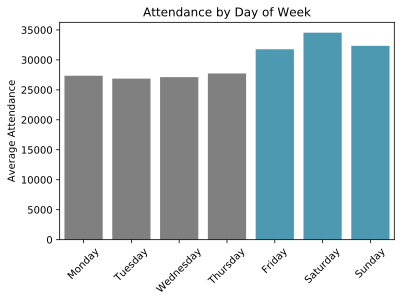

In [312]:
%config InlineBackend.figure_format = 'svg'
weekday_plot = sns.barplot(x = 'weekday', y='Attendance', 
            data=df, 
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
            ci = None, 
            palette = ['grey', 'grey', 'grey', 'grey', 'deepskyblue', 'deepskyblue', 'deepskyblue'], 
            saturation = .4);

for item in weekday_plot.get_xticklabels():
    item.set_rotation(45)

day_of_week_plot = weekday_plot.set(xlabel='', ylabel='Average Attendance', title='Attendance by Day of Week')
plt.show()

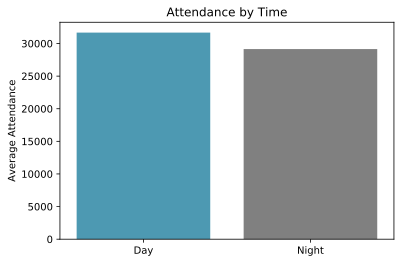

In [318]:
time_of_day_plot = sns.barplot(x = 'is_night', y='Attendance', 
            data=df, 
#             order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
            ci = None, 
            palette = ['deepskyblue', 'grey'], 
            saturation = .4);

for item in weekday_plot.get_xticklabels():
    item.set_rotation(45)

time_plot = time_of_day_plot.set(xlabel='', ylabel='Average Attendance', title='Attendance by Time')
time_of_day_plot.set(xticklabels=['Day', 'Night'])
plt.show()

In [307]:
day_of_week_plot2 = weekday_plot.get_figure()

day_of_week_plot2.savefig("day_of_week.png")

Below I am creating the "is_weekend" variable, including Friday, Saturday, and Sunday

In [190]:
cols = ['weekday', 'is_weekend']
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
is_weekend_vals = [0,0,0,0,1,1,1]
dvals = list(zip(days,is_weekend_vals))

is_weekday_df = pd.DataFrame(data=dvals, columns=cols)
is_weekday_df

,weekday,is_weekend
0,Monday,0
1,Tuesday,0
2,Wednesday,0
3,Thursday,0
4,Friday,1
5,Saturday,1
6,Sunday,1


In [193]:
df = pd.merge(df, is_weekday_df, how='left', left_on='weekday', right_on='weekday')
df.sample(20)

,Attendance,Gm#,Date,Tm,Opp,W/L,runs_scored,runs_allowed,W-L,Rank,...,Opp_Rank,Opp_GB,Opp_Mean_runs_last_10,opp_batter_age,opp_current_all_stars,opp_lifetime_all_stars,opp_player_salary,datetime,weekday,is_weekend
12268,17225.0,32,201605100,MIA,MIL,L,2,10,17-15,4,...,4,12.0,6.5,27.5,1,7,52077500,2016-05-10,Tuesday,0
12331,18347.0,93,201607190,MIA,PHI,W,2,1,51-42,2,...,4,13.5,3.4,26.9,1,6,84846666,2016-07-19,Tuesday,0
2702,41514.0,45,201405230,MIN,SFG,L,2,6,23-22,2,...,1,-5.0,4.4,28.6,3,16,163510167,2014-05-23,Friday,1
24765,11779.0,104,201807280,WSN,MIA,L-wo,1,2,52-52,3,...,4,14.0,4.1,27.5,1,3,86515143,2018-07-28,Saturday,1
14475,32806.0,106,201607310,TEX,KCR,W,5,3,62-44,1,...,4,12.0,2.6,28.5,4,13,125132675,2016-07-31,Sunday,1
3810,17311.0,151,201409170,SDP,PHI,L,2,5,70-81,3,...,5,17.5,3.0,30.8,1,12,176444967,2014-09-17,Wednesday,0
8880,46119.0,91,201507180,SEA,NYY,W,4,3,42-49,4,...,1,-3.5,4.1,31.4,3,15,214051957,2015-07-18,Saturday,1
8052,38047.0,87,201507110,NYY,BOS,L,3,5,47-40,1,...,5,5.5,5.3,28.3,1,19,183931900,2015-07-11,Saturday,1
15333,28401.0,144,201709110,BAL,TOR,L,3,4,71-73,3,...,5,14.5,4.5,31.0,2,13,158890575,2017-09-11,Monday,0
2885,34697.0,58,201406030,NYM,CHC,L-wo,1,2,28-30,4,...,5,12.0,3.0,26.8,3,7,59800500,2014-06-03,Tuesday,0


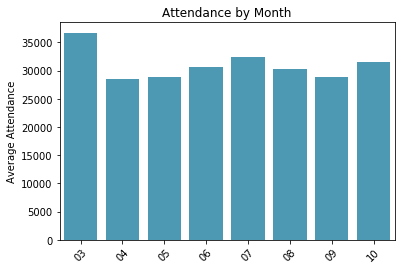

In [207]:
%config InlineBackend.figure_format = 'svg'
month_plot = sns.barplot(x = 'month', y='Attendance', 
            data=df,  
            ci = None, 
            color = 'deepskyblue', 
            saturation = .4);

for item in month_plot.get_xticklabels():
    item.set_rotation(45)

month_plot.set(xlabel='', ylabel='Average Attendance', title='Attendance by Month')
plt.show()

Pickling this df before I:
 - filter by home
 - remove non-regression features
 - remove any rows with null entries for attendance
 - fill na's in wins last 10 with mean
 
Once I do the above, it's ready for the regression

In [196]:
with open('merged_df_added_opp_values_before_reg_filters.pickle', 'wb') as to_write:
    pickle.dump(df, to_write)

Below I am filtering out away games, then I will pick columns. Same as regression one as before but adding Opp columns

In [201]:
df_linreg = df[df['is_home'] == 1]
df_linreg.info()
##this is exactly half of the other df, so looks good so far

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12416 entries, 6 to 24828
Data columns (total 47 columns):
Attendance                12318 non-null float64
Gm#                       12416 non-null int64
Date                      12416 non-null object
Tm                        12416 non-null object
Opp                       12416 non-null object
W/L                       12416 non-null object
runs_scored               12416 non-null int64
runs_allowed              12416 non-null int64
W-L                       12416 non-null object
Rank                      12416 non-null int64
GB                        12416 non-null float64
Time                      12416 non-null object
is_night                  12416 non-null int64
Streak                    12416 non-null object
is_home                   12416 non-null int64
Total_wins                12416 non-null int64
Total_losses              12416 non-null int64
cum_runs_scored           12416 non-null int64
cum_runs_allowed          12416 no

In [209]:
cols_for_linreg = ['Attendance',
 'Gm#',
 'Rank',
 'GB',
 'is_night',
 'run_differential',
 'Win_differential',
 'Wins_last_10',
 'Mean_runs_last_10',
 'batter_age',
 'current_all_stars',
 'lifetime_all_stars',
 'player_salary',
 'Opp_Wins_last_10',
 'Opp_Win_differential',
 'Opp_Rank',
 'Opp_GB',
 'Opp_Mean_runs_last_10',
 'opp_batter_age',
 'opp_current_all_stars',
 'opp_lifetime_all_stars',
 'opp_player_salary',
 'is_weekend']

##Can pair this down but good to save here

In [212]:
df_linreg = df_linreg[cols_for_linreg]

df_linreg.head()
df_linreg.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 12416 entries, 6 to 24828
Data columns (total 23 columns):
Attendance                12318 non-null float64
Gm#                       12416 non-null int64
Rank                      12416 non-null int64
GB                        12416 non-null float64
is_night                  12416 non-null int64
run_differential          12416 non-null int64
Win_differential          12416 non-null int64
Wins_last_10              11735 non-null float64
Mean_runs_last_10         12416 non-null float64
batter_age                12416 non-null float64
current_all_stars         12416 non-null int64
lifetime_all_stars        12416 non-null int64
player_salary             12416 non-null int64
Opp_Wins_last_10          11735 non-null float64
Opp_Win_differential      12416 non-null int64
Opp_Rank                  12416 non-null int64
Opp_GB                    12416 non-null float64
Opp_Mean_runs_last_10     12416 non-null float64
opp_batter_age            124

Dropping n/a attendance values below:

In [213]:
df_linreg.dropna(subset=['Attendance'], inplace = True)
df_linreg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12318 entries, 6 to 24828
Data columns (total 23 columns):
Attendance                12318 non-null float64
Gm#                       12318 non-null int64
Rank                      12318 non-null int64
GB                        12318 non-null float64
is_night                  12318 non-null int64
run_differential          12318 non-null int64
Win_differential          12318 non-null int64
Wins_last_10              11639 non-null float64
Mean_runs_last_10         12318 non-null float64
batter_age                12318 non-null float64
current_all_stars         12318 non-null int64
lifetime_all_stars        12318 non-null int64
player_salary             12318 non-null int64
Opp_Wins_last_10          11639 non-null float64
Opp_Win_differential      12318 non-null int64
Opp_Rank                  12318 non-null int64
Opp_GB                    12318 non-null float64
Opp_Mean_runs_last_10     12318 non-null float64
opp_batter_age            123

Meaning missing wins_last_10 values below:

In [214]:
df_linreg = df_linreg.fillna(df_linreg.mean())
df_linreg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12318 entries, 6 to 24828
Data columns (total 23 columns):
Attendance                12318 non-null float64
Gm#                       12318 non-null int64
Rank                      12318 non-null int64
GB                        12318 non-null float64
is_night                  12318 non-null int64
run_differential          12318 non-null int64
Win_differential          12318 non-null int64
Wins_last_10              12318 non-null float64
Mean_runs_last_10         12318 non-null float64
batter_age                12318 non-null float64
current_all_stars         12318 non-null int64
lifetime_all_stars        12318 non-null int64
player_salary             12318 non-null int64
Opp_Wins_last_10          12318 non-null float64
Opp_Win_differential      12318 non-null int64
Opp_Rank                  12318 non-null int64
Opp_GB                    12318 non-null float64
Opp_Mean_runs_last_10     12318 non-null float64
opp_batter_age            123

In [227]:
df_linreg_max_features = df_linreg.copy()

In [228]:
with open('regression_data_v3_max_features.pickle', 'wb') as to_write:
    pickle.dump(df_linreg_max_features, to_write)

In [221]:
corr = df_linreg.corr()
corr

,Attendance,Gm#,Rank,GB,is_night,run_differential,Win_differential,Wins_last_10,Mean_runs_last_10,batter_age,...,Opp_Wins_last_10,Opp_Win_differential,Opp_Rank,Opp_GB,Opp_Mean_runs_last_10,opp_batter_age,opp_current_all_stars,opp_lifetime_all_stars,opp_player_salary,is_weekend
Attendance,1.000000,0.034016,-0.328797,-0.280089,-0.119577,0.347011,0.357052,0.175483,0.090585,0.255325,...,-0.010303,0.030410,-0.013288,-0.016636,-0.041793,0.005322,0.041622,0.067223,0.053565,0.285766
Gm#,0.034016,1.000000,0.030495,0.343676,0.050443,0.000280,0.003473,0.009116,0.045391,0.006090,...,-0.007515,0.002374,0.032773,0.345866,0.033556,-0.007605,0.003723,0.002883,-0.006000,0.032328
Rank,-0.328797,0.030495,1.000000,0.713660,0.010205,-0.709013,-0.772279,-0.437631,-0.236625,-0.170115,...,0.128135,0.117654,-0.150910,-0.099718,0.122056,0.011231,0.074882,0.036496,0.028398,-0.004624
GB,-0.280089,0.343676,0.713660,1.000000,0.032202,-0.769446,-0.830703,-0.385033,-0.155026,-0.151330,...,0.097876,0.115094,-0.085874,0.046972,0.099352,-0.012238,0.063899,0.014794,0.024696,0.004760
is_night,-0.119577,0.050443,0.010205,0.032202,1.000000,-0.022103,-0.014627,-0.025594,-0.018387,0.006022,...,0.033962,0.017088,-0.021323,0.004852,0.015197,0.017921,0.013108,0.025859,0.020117,-0.267477
run_differential,0.347011,0.000280,-0.709013,-0.769446,-0.022103,1.000000,0.907203,0.416624,0.258948,0.124189,...,-0.100918,-0.097967,0.094613,0.108000,-0.089329,0.004860,-0.068809,-0.030909,-0.017396,0.006604
Win_differential,0.357052,0.003473,-0.772279,-0.830703,-0.014627,0.907203,1.000000,0.463211,0.219169,0.168324,...,-0.114752,-0.112375,0.111708,0.124021,-0.087142,0.001290,-0.061714,-0.028611,-0.024576,0.007219
Wins_last_10,0.175483,0.009116,-0.437631,-0.385033,-0.025594,0.416624,0.463211,1.000000,0.498937,0.066908,...,-0.259727,-0.120330,0.119026,0.108603,-0.157563,-0.002439,-0.063511,-0.016638,-0.036168,0.009858
Mean_runs_last_10,0.090585,0.045391,-0.236625,-0.155026,-0.018387,0.258948,0.219169,0.498937,1.000000,0.008824,...,-0.126571,-0.071116,0.089416,0.092009,0.047860,-0.016881,-0.085627,-0.065196,0.000754,0.002794
batter_age,0.255325,0.006090,-0.170115,-0.151330,0.006022,0.124189,0.168324,0.066908,0.008824,1.000000,...,-0.007826,-0.000386,0.013053,-0.003929,-0.022065,-0.004025,-0.009064,0.024000,-0.034367,-0.000602


In [229]:
df_linreg_less_features = df_linreg.copy()

In [231]:
cols_for_linreg_less = ['Attendance',
 'Rank',
 'GB',
 'is_night',
 'run_differential',
 'Win_differential',
 'Wins_last_10',
 'batter_age',
 'current_all_stars',
 'lifetime_all_stars',
 'player_salary',
 'is_weekend']

In [232]:
df_linreg_less_features = df_linreg_less_features[cols_for_linreg_less]

In [233]:
df_linreg_less_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12318 entries, 6 to 24828
Data columns (total 12 columns):
Attendance            12318 non-null float64
Rank                  12318 non-null int64
GB                    12318 non-null float64
is_night              12318 non-null int64
run_differential      12318 non-null int64
Win_differential      12318 non-null int64
Wins_last_10          12318 non-null float64
batter_age            12318 non-null float64
current_all_stars     12318 non-null int64
lifetime_all_stars    12318 non-null int64
player_salary         12318 non-null int64
is_weekend            12318 non-null int64
dtypes: float64(4), int64(8)
memory usage: 1.2 MB


In [234]:
with open('regression_data_v3_less_features.pickle', 'wb') as to_write:
    pickle.dump(df_linreg_less_features, to_write)

Below I am going to create a new y variable - % of stadium empty, log transformed.

This should help make my errors more norma. We will find out!

In [288]:
df_att_cap = df.copy()
df_att_cap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24832 entries, 0 to 24831
Data columns (total 47 columns):
Attendance                24636 non-null float64
Gm#                       24832 non-null int64
Date                      24832 non-null object
Tm                        24832 non-null object
Opp                       24832 non-null object
W/L                       24832 non-null object
runs_scored               24832 non-null int64
runs_allowed              24832 non-null int64
W-L                       24832 non-null object
Rank                      24832 non-null int64
GB                        24832 non-null float64
Time                      24832 non-null object
is_night                  24832 non-null int64
Streak                    24832 non-null object
is_home                   24832 non-null int64
Total_wins                24832 non-null int64
Total_losses              24832 non-null int64
cum_runs_scored           24832 non-null int64
cum_runs_allowed          24832 no

In [289]:
stad_caps = pd.read_csv('/Users/robertpagano/src/metis_project_luther/Data/stadium_capacities.csv', delimiter=',')
stad_caps

,Tm,stadium_cap
0,ARI,48686
1,ATL,41084
2,BAL,45971
3,BOS,37755
4,CHC,41649
5,CHW,40615
6,CIN,42319
7,CLE,35041
8,COL,46897
9,DET,41299


In [290]:
df_cap_calc = df_att_cap.groupby(['Tm'])[['Attendance']].max()
df_cap_calc = df_cap_calc.reset_index()
df_cap_calc = df_cap_calc.rename(columns = {'Attendance': 'stadium_cap'})
df_cap_calc

,Tm,stadium_cap
0,ARI,53279.0
1,ATL,52718.0
2,BAL,48613.0
3,BOS,52728.0
4,CHC,53904.0
5,CHW,52413.0
6,CIN,49911.0
7,CLE,50199.0
8,COL,53632.0
9,DET,53231.0


In [291]:
df_att_cap = pd.merge(df_att_cap, df_cap_calc, how='left', left_on='Tm', right_on='Tm')
df_att_cap.sample(5)

,Attendance,Gm#,Date,Tm,Opp,W/L,runs_scored,runs_allowed,W-L,Rank,...,Opp_GB,Opp_Mean_runs_last_10,opp_batter_age,opp_current_all_stars,opp_lifetime_all_stars,opp_player_salary,datetime,weekday,is_weekend,stadium_cap
20671,39442.0,160,201809280,CHC,STL,W,8,4,94-66,1,...,7.0,5.4,28.1,2,11,157713667,2018-09-28,Friday,1,53904.0
19826,29057.0,155,201709240,WSN,NYM,W,3,2,94-61,1,...,28.0,3.9,28.9,1,11,176615252,2017-09-24,Sunday,1,51297.0
8284,14452.0,153,201509240,OAK,TEX,L,1,8,64-89,5,...,-3.5,7.2,28.7,1,11,178860789,2015-09-24,Thursday,0,56310.0
21552,17842.0,37,201805100,KCR,BAL,L,6,11,12-25,4,...,16.0,4.5,28.4,1,10,141555833,2018-05-10,Thursday,0,48110.0
12179,28682.0,107,201608030,LAD,COL,L,2,12,59-48,2,...,7.0,5.6,27.8,2,5,89707000,2016-08-03,Wednesday,0,53904.0


In [292]:
df_att_cap['attendance_percent_empty'] = 1 - (df_att_cap['Attendance'] / (df_att_cap['stadium_cap']+1))
df_att_cap.head()

,Attendance,Gm#,Date,Tm,Opp,W/L,runs_scored,runs_allowed,W-L,Rank,...,Opp_Mean_runs_last_10,opp_batter_age,opp_current_all_stars,opp_lifetime_all_stars,opp_player_salary,datetime,weekday,is_weekend,stadium_cap,attendance_percent_empty
0,45691.0,1,201403310,ATL,MIL,L,0,2,0-1,4,...,2.000000,28.8,4,14,109567000,2014-03-31,Monday,0,52718.0,0.133311
1,21503.0,2,201404010,ATL,MIL,W,5,2,1-1,3,...,2.000000,28.8,4,14,109567000,2014-04-01,Tuesday,0,52718.0,0.592120
2,21712.0,3,201404020,ATL,MIL,W,1,0,2-1,2,...,1.333333,28.8,4,14,109567000,2014-04-02,Wednesday,0,52718.0,0.588156
3,42834.0,4,201404040,ATL,WSN,W,2,1,3-1,2,...,5.750000,28.8,2,14,137235080,2014-04-04,Friday,1,52718.0,0.187504
4,37841.0,5,201404050,ATL,WSN,W,6,2,4-1,2,...,5.000000,28.8,2,14,137235080,2014-04-05,Saturday,1,52718.0,0.282213


In [293]:
df_att_cap['attendance_percent_empty_log1p'] = np.log1p(df_att_cap['attendance_percent_empty'])
df_att_cap.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log1p
  """Entry point for launching an IPython kernel.


,Attendance,Gm#,Date,Tm,Opp,W/L,runs_scored,runs_allowed,W-L,Rank,...,opp_batter_age,opp_current_all_stars,opp_lifetime_all_stars,opp_player_salary,datetime,weekday,is_weekend,stadium_cap,attendance_percent_empty,attendance_percent_empty_log1p
0,45691.0,1,201403310,ATL,MIL,L,0,2,0-1,4,...,28.8,4,14,109567000,2014-03-31,Monday,0,52718.0,0.133311,0.125143
1,21503.0,2,201404010,ATL,MIL,W,5,2,1-1,3,...,28.8,4,14,109567000,2014-04-01,Tuesday,0,52718.0,0.592120,0.465067
2,21712.0,3,201404020,ATL,MIL,W,1,0,2-1,2,...,28.8,4,14,109567000,2014-04-02,Wednesday,0,52718.0,0.588156,0.462574
3,42834.0,4,201404040,ATL,WSN,W,2,1,3-1,2,...,28.8,2,14,137235080,2014-04-04,Friday,1,52718.0,0.187504,0.171853
4,37841.0,5,201404050,ATL,WSN,W,6,2,4-1,2,...,28.8,2,14,137235080,2014-04-05,Saturday,1,52718.0,0.282213,0.248588


In [294]:
df_att_cap.dropna(subset=['Attendance'], inplace = True)
df_att_cap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24636 entries, 0 to 24831
Data columns (total 50 columns):
Attendance                        24636 non-null float64
Gm#                               24636 non-null int64
Date                              24636 non-null object
Tm                                24636 non-null object
Opp                               24636 non-null object
W/L                               24636 non-null object
runs_scored                       24636 non-null int64
runs_allowed                      24636 non-null int64
W-L                               24636 non-null object
Rank                              24636 non-null int64
GB                                24636 non-null float64
Time                              24636 non-null object
is_night                          24636 non-null int64
Streak                            24636 non-null object
is_home                           24636 non-null int64
Total_wins                        24636 non-null int64


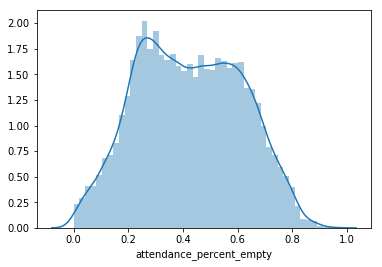

In [295]:
sns.distplot(df_att_cap['attendance_percent_empty']);

Text(0.5,1,'Ratio of Stadium Empty - log1p Transformed')

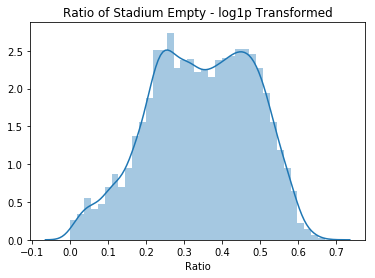

In [311]:
sns.distplot(df_att_cap['attendance_percent_empty_log1p']);

plt.xlabel('Ratio')
plt.title('Ratio of Stadium Empty - log1p Transformed')

Text(0.5,1,'Regular Attendance')

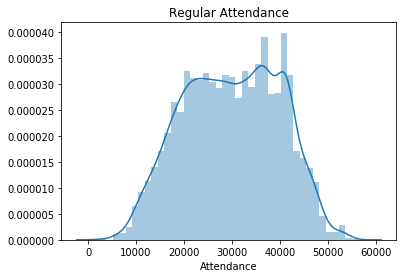

In [310]:
sns.distplot(df_att_cap['Attendance']);

plt.xlabel('Attendance')
plt.title('Regular Attendance')

In [297]:
df_att_cap = df_att_cap.fillna(df_att_cap.mean())
df_att_cap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24636 entries, 0 to 24831
Data columns (total 50 columns):
Attendance                        24636 non-null float64
Gm#                               24636 non-null int64
Date                              24636 non-null object
Tm                                24636 non-null object
Opp                               24636 non-null object
W/L                               24636 non-null object
runs_scored                       24636 non-null int64
runs_allowed                      24636 non-null int64
W-L                               24636 non-null object
Rank                              24636 non-null int64
GB                                24636 non-null float64
Time                              24636 non-null object
is_night                          24636 non-null int64
Streak                            24636 non-null object
is_home                           24636 non-null int64
Total_wins                        24636 non-null int64


In [298]:
df_att_cap = df_att_cap[df_att_cap['is_home'] == 1]
df_att_cap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12318 entries, 6 to 24828
Data columns (total 50 columns):
Attendance                        12318 non-null float64
Gm#                               12318 non-null int64
Date                              12318 non-null object
Tm                                12318 non-null object
Opp                               12318 non-null object
W/L                               12318 non-null object
runs_scored                       12318 non-null int64
runs_allowed                      12318 non-null int64
W-L                               12318 non-null object
Rank                              12318 non-null int64
GB                                12318 non-null float64
Time                              12318 non-null object
is_night                          12318 non-null int64
Streak                            12318 non-null object
is_home                           12318 non-null int64
Total_wins                        12318 non-null int64


In [299]:
cols_for_linreg_less_att_cap = ['attendance_percent_empty_log1p',
 'Rank',
 'GB',
 'is_night',
 'run_differential',
 'Win_differential',
 'Wins_last_10',
 'batter_age',
 'current_all_stars',
 'lifetime_all_stars',
 'player_salary',
 'is_weekend']

In [300]:
df_att_cap_linreg_less_features = df_att_cap[cols_for_linreg_less_att_cap]
df_att_cap_linreg_less_features.head()

,attendance_percent_empty_log1p,Rank,GB,is_night,run_differential,Win_differential,Wins_last_10,batter_age,current_all_stars,lifetime_all_stars,player_salary,is_weekend
6,0.100523,3,1.0,1,2,1,5.001461,26.8,3,9,108081500,0
7,0.487393,2,1.0,1,3,2,5.001461,26.8,3,9,108081500,0
8,0.365336,2,2.0,1,1,1,5.001461,26.8,3,9,108081500,0
9,0.381359,2,1.0,1,2,2,6.000000,26.8,3,9,108081500,1
10,0.266475,1,0.0,1,5,3,7.000000,26.8,3,9,108081500,1


In [301]:
with open('regression_data_v3_att_cap_less_features.pickle', 'wb') as to_write:
    pickle.dump(df_att_cap_linreg_less_features, to_write)